In [1]:
pip install pyforest


You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
from pyforest import *
lazy_imports()

['import tensorflow as tf',
 'import xgboost as xgb',
 'import bokeh',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import altair as alt',
 'import dash',
 'import sys',
 'from openpyxl import load_workbook',
 'from dask import dataframe as dd',
 'import numpy as np',
 'import tqdm',
 'import lightgbm as lgb',
 'from sklearn.preprocessing import OneHotEncoder',
 'import os',
 'import matplotlib.pyplot as plt',
 'from sklearn.model_selection import train_test_split',
 'import awswrangler as wr',
 'import pandas as pd',
 'from sklearn.ensemble import RandomForestRegressor',
 'import re',
 'import pydot',
 'from sklearn import svm',
 'import sklearn',
 'import seaborn as sns',
 'import spacy',
 'from sklearn.ensemble import RandomForestClassifier',
 'from sklearn.manifold import TSNE',
 'import plotly as py',
 'import datetime as dt',
 'import statistics',
 'import keras',
 'import matplotlib as mpl',
 'from pathlib import Path',
 'import gensim',
 'import plotly.express 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# mutiple output in same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

In [5]:
## ignor the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action="ignore",category=DeprecationWarning)

In [6]:
## Display all the Rows and columns in the dataframe instade of small version
from IPython.display import display
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [7]:
main_data=pd.read_csv("breastCancer.csv")

In [8]:
main_data

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [9]:
###Sample code number: id number
#Clump Thickness: 1 - 10
#Uniformity of Cell Size: 1 - 10
#Uniformity of Cell Shape: 1 - 10
#Marginal Adhesion: 1 - 10
#Single Epithelial Cell Size: 1 - 10
#Bare Nuclei: 1 - 10
#Bland Chromatin: 1 - 10
#Normal Nucleoli: 1 - 10
#Mitoses: 1 - 10
#Class: (2 for benign, 4 for malignant)
#Malignant==> Cancerous

#Benign==> Not Cancerous (Healthy)

###

In [10]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [11]:
main_data.describe()
main_data.describe(include = ["O"])

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


,bare_nucleoli
count,699
unique,11
top,1
freq,402


Here bare_nucleoli has 11 unique values , lets check them more

In [12]:
main_data.isnull().any()

id                   False
clump_thickness      False
size_uniformity      False
shape_uniformity     False
marginal_adhesion    False
epithelial_size      False
bare_nucleoli        False
bland_chromatin      False
normal_nucleoli      False
mitoses              False
class                False
dtype: bool

In [13]:
main_data["bare_nucleoli"].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nucleoli, dtype: int64

bare_nucleoli has special character ? which has to be removed for further analysis.

In [14]:
## now replacing ? with median of the column. we cant delete the results because of losing some information.
main_data.median()

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      2.0
dtype: float64

Here medican of bare_nucleoli is not available.

In [15]:
## before we have to replace ? with nan so can replace with median.

nan_data=main_data.replace("?",np.nan)

bare_nucleoli special ? character, we have to replace with nan, after that we will get the median.

In [50]:
nan_data.median()

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      2.0
dtype: float64

Now we can find the median of bare_nucleoli.

In [17]:
## Replacing nan with median of the column.

original_data=nan_data.fillna(nan_data.median())

In [18]:
original_data

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [19]:
## No more ? and nan present in the column.

original_data['bare_nucleoli'].value_counts()

1      402
10     132
5       30
2       30
3       28
8       21
4       19
1.0     16
9        9
7        8
6        4
Name: bare_nucleoli, dtype: int64

In [20]:
original_data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [21]:
## Now changing the data types from Object to int for model building.
original_data["bare_nucleoli"]=original_data["bare_nucleoli"].astype("int64")

In [22]:
original_data.dtypes

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

## Exploratory data analysis

In [23]:
original_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
clump_thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409e+00,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


In [24]:
## Now droping unnessesory columns. ID
original_data1=original_data.drop('id', axis=1)

In [25]:
original_data1.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


<Figure size 1080x864 with 0 Axes>

<AxesSubplot:>

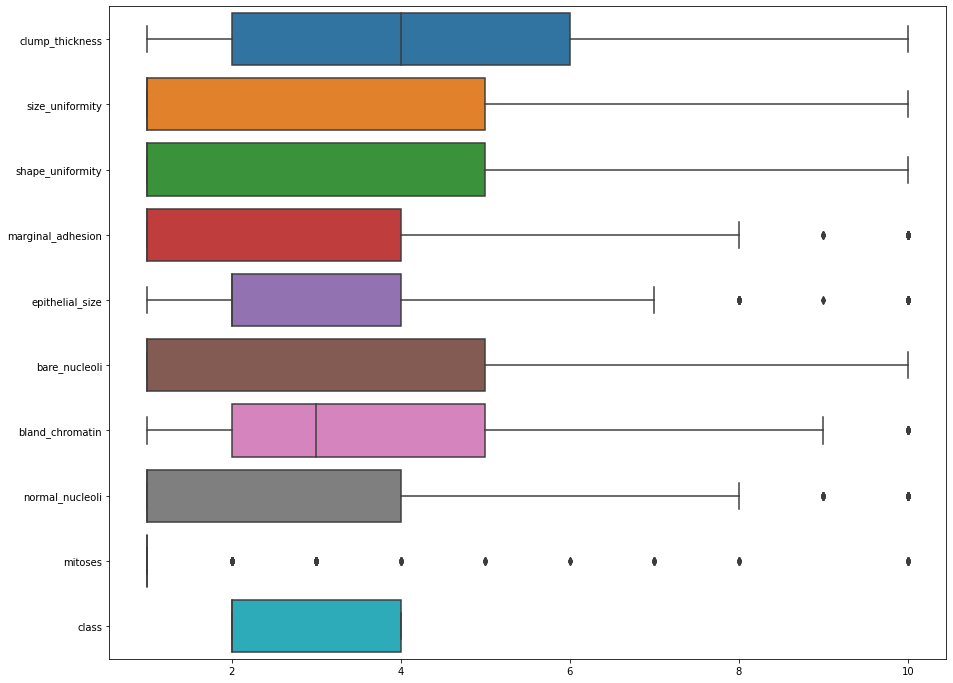

In [26]:
## now checking any outliers.
plt.figure(figsize=(15,12))
sns.boxplot(data=original_data1, orient="h")

<AxesSubplot:ylabel='Frequency'>

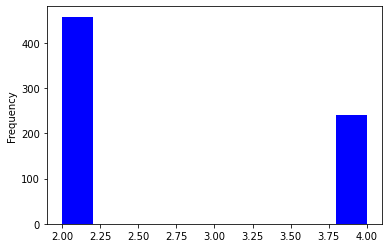

In [27]:
## Now check the distribution of the class column.
original_data1["class"].plot(kind="hist",color="blue")


([<matplotlib.patches.Wedge at 0x22d94eccd90>,
 [Text(-0.5153999431731403, 0.971783359899275, 'class=2'),
  Text(0.5154000341580625, -0.9717833116440456, 'class4')],
 [Text(-0.2811272417308038, 0.53006365085415, '65.5%'),
  Text(0.28112729135894315, -0.5300636245331157, '34.5%')])

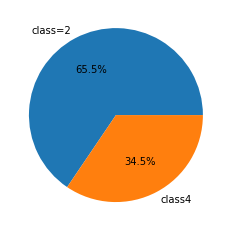

In [28]:
fig, ax = plt.subplots(1,1)
ax.pie(original_data1["class"].value_counts(), autopct='%1.1f%%', labels=["class=2","class4"])
plt.axis= "equal"

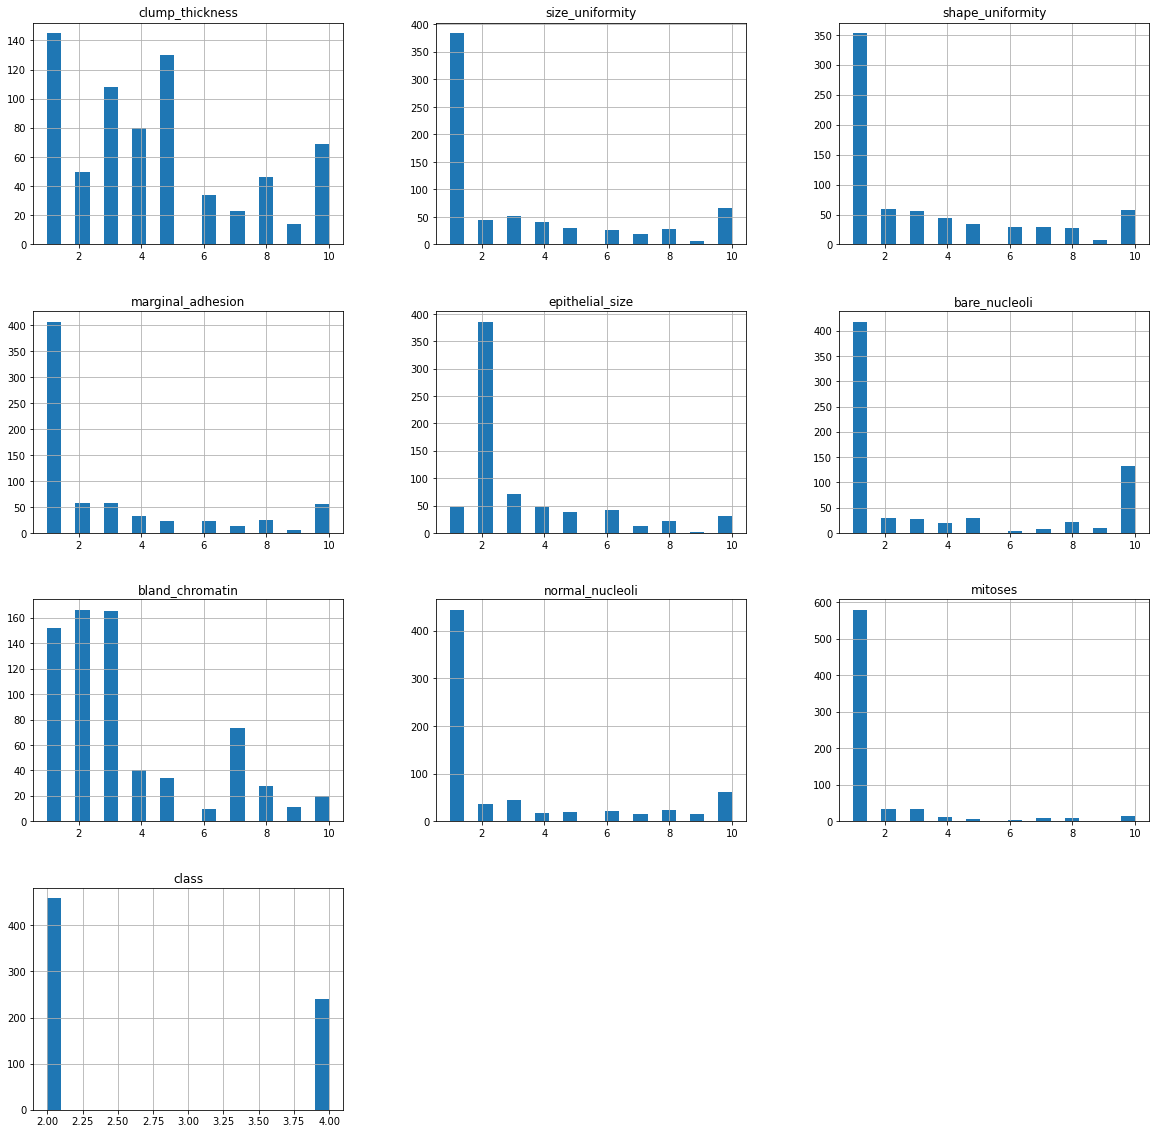

In [29]:
## Multivariant analysis, distribution of the dataset

original_data1.hist(bins=20,figsize=(20,20), layout=(4,3));

<AxesSubplot:xlabel='clump_thickness'>

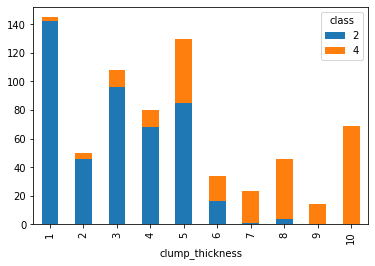

<AxesSubplot:xlabel='size_uniformity'>

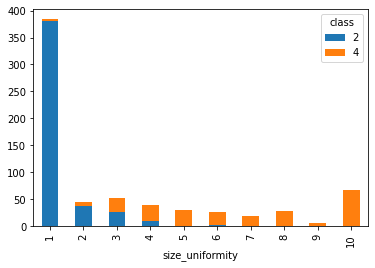

<AxesSubplot:xlabel='shape_uniformity'>

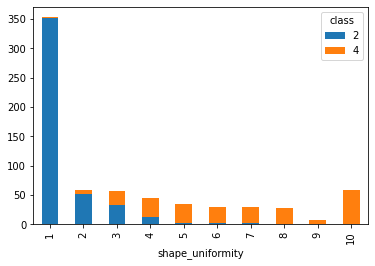

<AxesSubplot:xlabel='marginal_adhesion'>

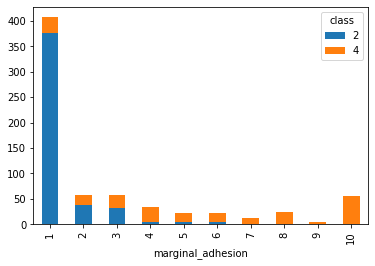

<AxesSubplot:xlabel='epithelial_size'>

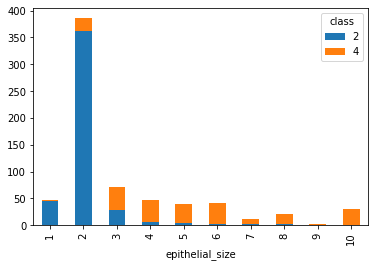

<AxesSubplot:xlabel='bare_nucleoli'>

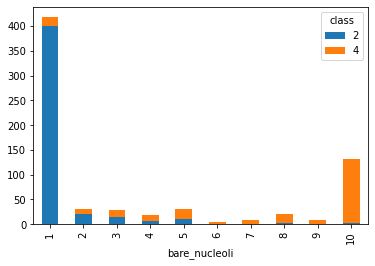

<AxesSubplot:xlabel='bland_chromatin'>

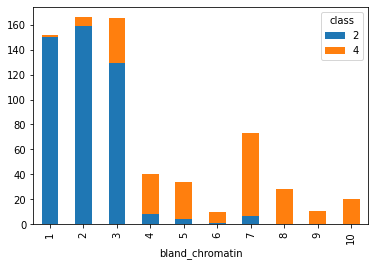

<AxesSubplot:xlabel='normal_nucleoli'>

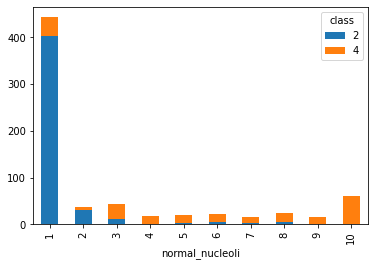

<AxesSubplot:xlabel='mitoses'>

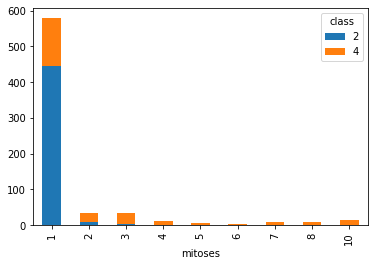

In [30]:
for i in range(9):
    column = original_data1.iloc[:,i]
    graph = pd.crosstab(column,original_data1["class"])
    graph.plot.bar(stacked=True)
    plt.show()

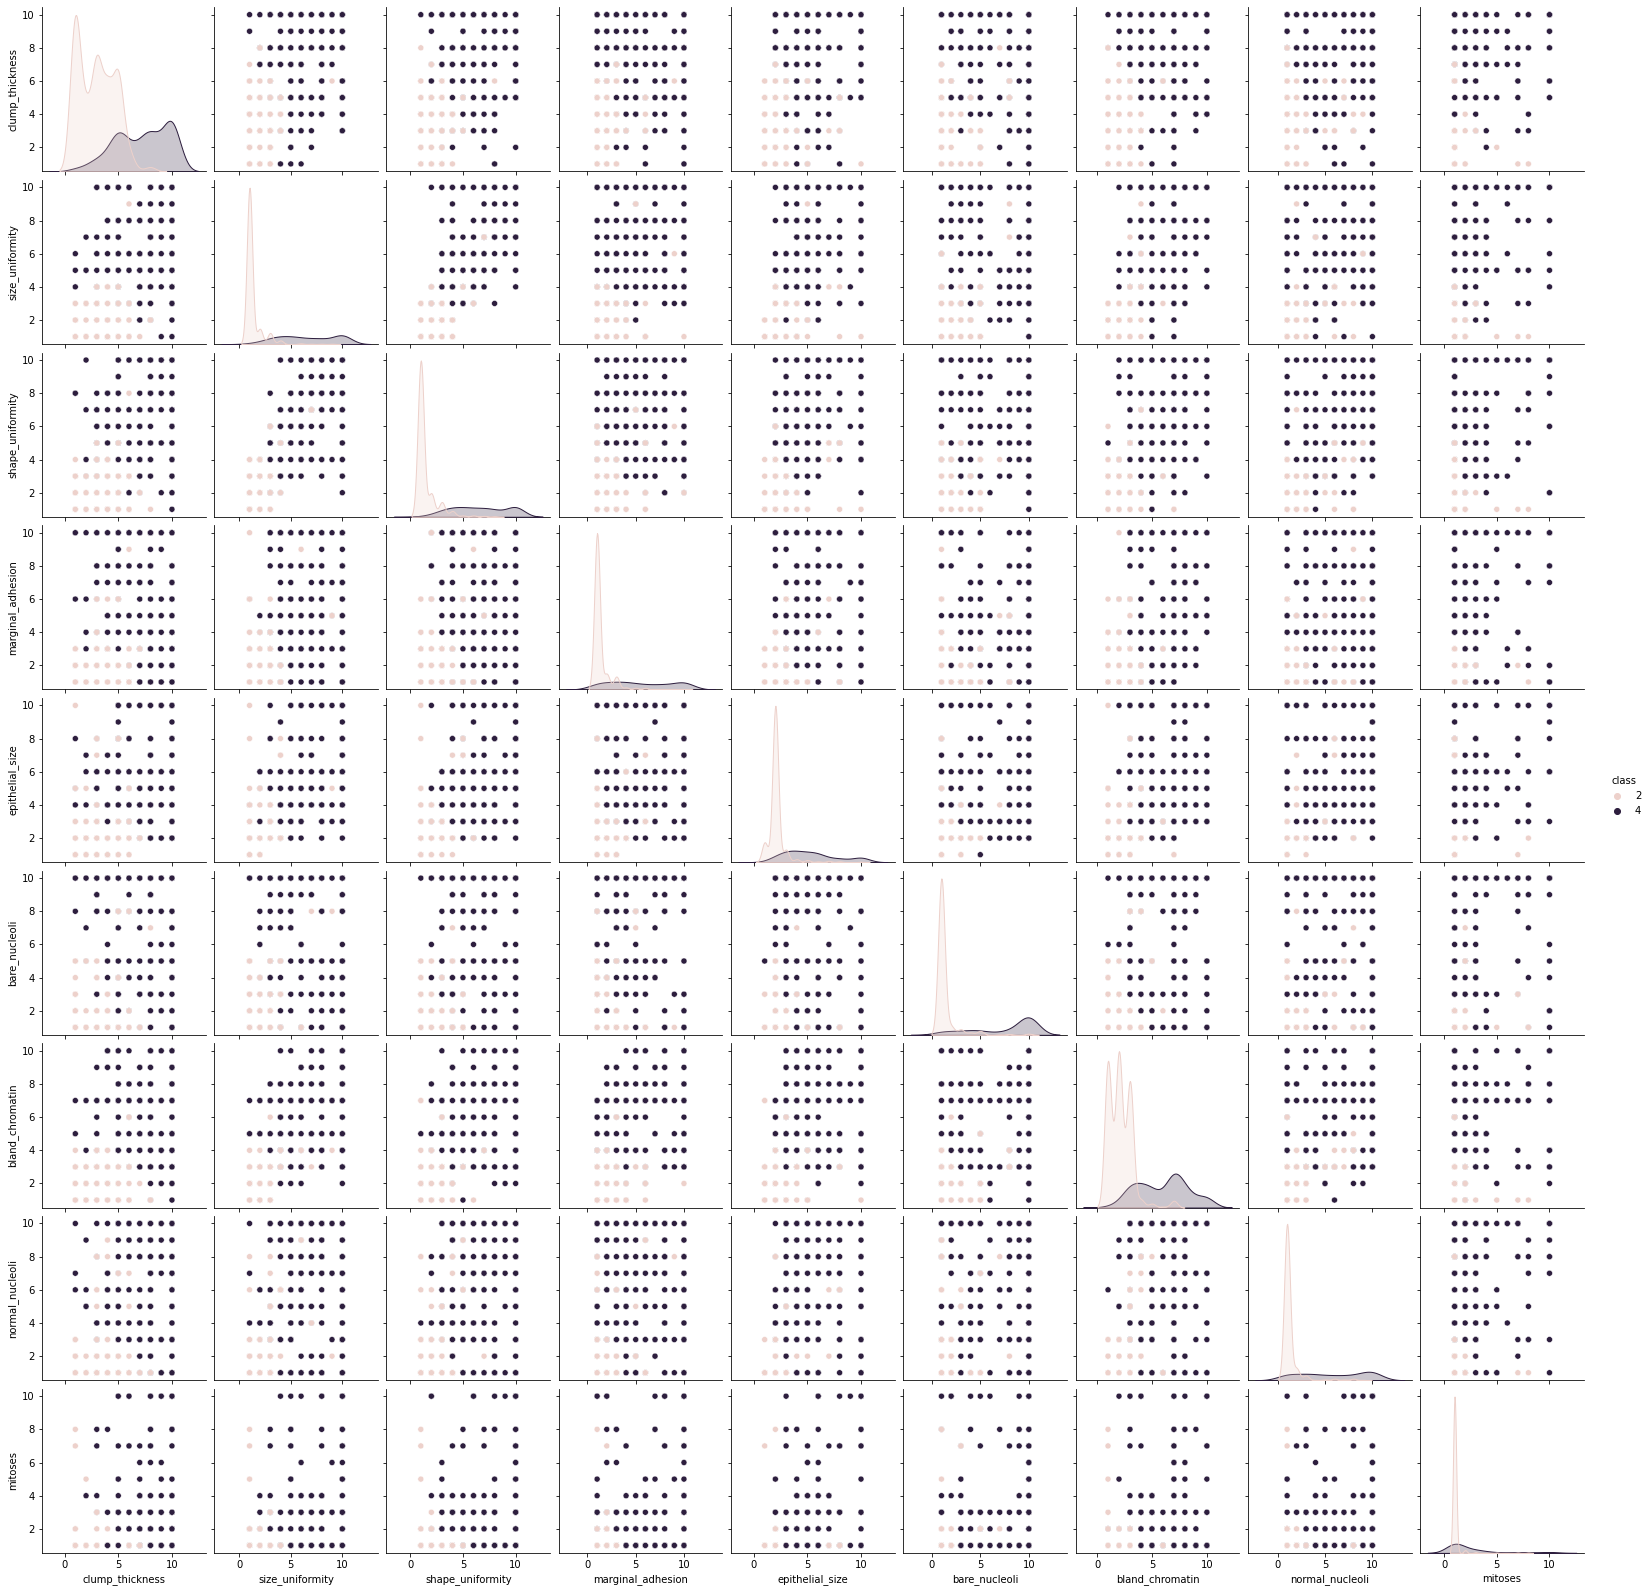

In [47]:
sns.pairplot(original_data1,hue="class")

In [31]:
## Coorelation visulization of the dataset.

original_data1.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


<Figure size 1440x1080 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Coorealtion between different attributes')

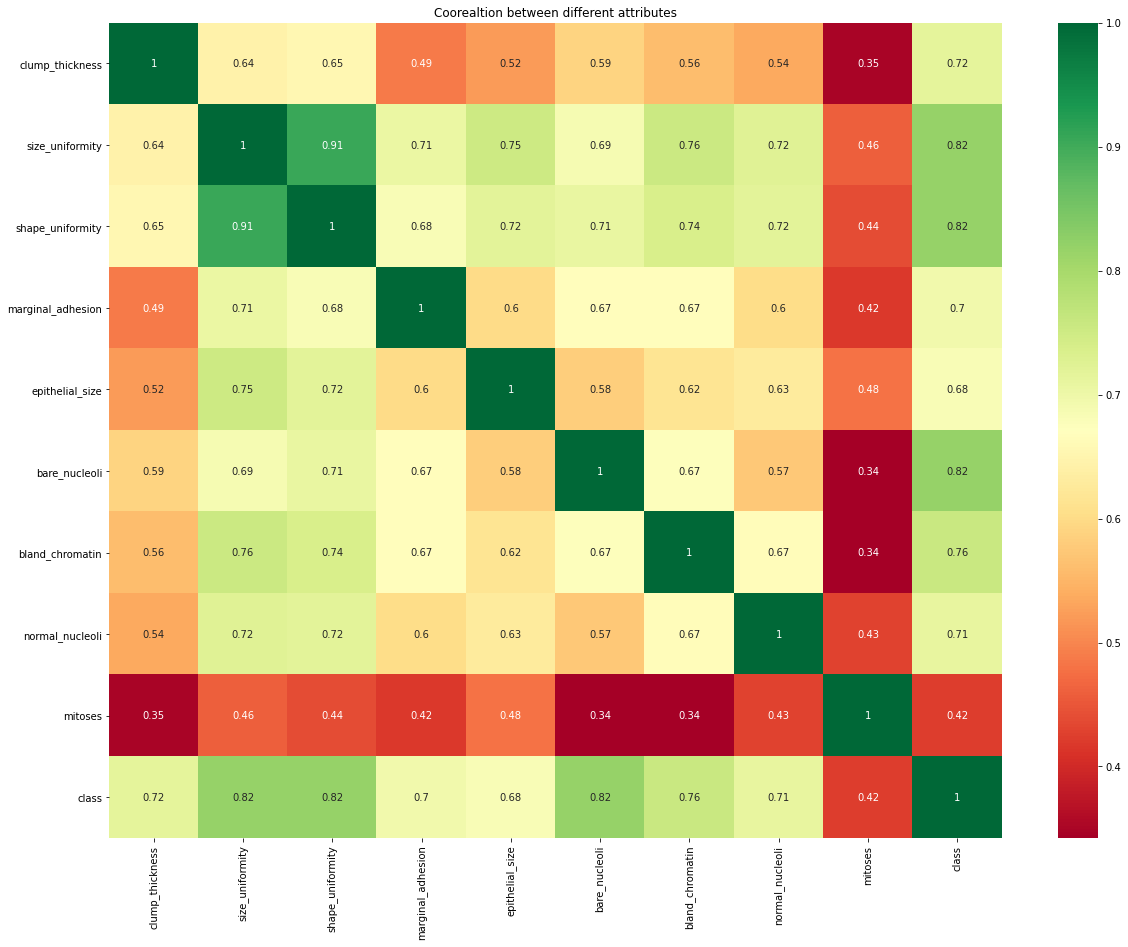

In [32]:
corrmat=original_data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,15))
sns.heatmap(original_data1[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.title("Coorealtion between different attributes")


Here we can see all the attributes are positively corelated to each other except mitoses.

Most corelated attributes are size_uniformity - shape_uniformity with 0.91

size_uniformity, shape_uniformity with class 0.82

class - bare_nucleoli 0.82

Training and Testing the dataset

In [33]:
X = original_data1.drop("class",axis=1)
Y = original_data1["class"]

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 1)

<IPython.core.display.Javascript object>

# KNeighborsClassifiers

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

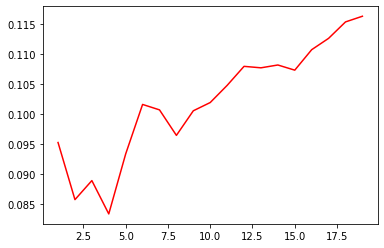

Best k parameter is  4


In [36]:
k_min = 2
test_MAE_array = []
k_array = []
MAE = 1

for k in range(1, 20):
    model = KNeighborsRegressor(n_neighbors=k, metric = 'minkowski').fit(X_train, Y_train)
    Predict_Y = model.predict(X_test)
    True_Y = Y_test
    test_MAE = mean_absolute_error(True_Y, Predict_Y)
    if test_MAE < MAE:
        MAE = test_MAE
        k_min = k
    test_MAE_array.append(test_MAE)
    k_array.append(k)
plt.plot(k_array, test_MAE_array,'r')
plt.show()
print("Best k parameter is ",k_min )

In [37]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 4, weights ='distance')

In [38]:
KNN.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [39]:
Y_pred=KNN.predict(X_test)
Y_pred

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2], dtype=int64)

In [40]:
from scipy.stats import zscore
print('KNN Algorithm predictiction is {}%'.format(KNN.score(X_test,Y_test)*100))

KNN Algorithm predictiction is 98.09523809523809%


In [41]:
from sklearn.metrics import classification_report

print("classsification_report KNN")

print(classification_report(Y_test,Y_pred))

classsification_report KNN
              precision    recall  f1-score   support

           2       0.98      0.99      0.99       137
           4       0.99      0.96      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



## Support Vector Mchine

In [42]:
from sklearn.svm import SVC
classifier_svc =SVC (kernel ="rbf", random_state=0)
classifier_svc.fit(X_train,Y_train)

SVC(random_state=0)

In [43]:
Y_pred_1 = classifier_svc.predict(X_test)
Y_pred_1

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2], dtype=int64)

In [64]:
from sklearn.metrics import classification_report  ## Printing the detailed report of Accuracy.
print("classification report of SVM")

print(classification_report(Y_test,Y_pred_1))

classification report of SVM
              precision    recall  f1-score   support

           2       0.99      0.99      0.99       137
           4       0.97      0.97      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



In [45]:
from sklearn.metrics import confusion_matrix
Y_pred=KNN.predict(X_test)
confusion_matrix(Y_test,Y_pred)


array([[136,   1],
       [  3,  70]], dtype=int64)

In [53]:
Y_pred_1 = classifier_svc.predict(X_test)
confusion_matrix(Y_test,Y_pred_1)

array([[135,   2],
       [  2,  71]], dtype=int64)

In [ ]:
## Analysing for overfitting and underfitting
print("Training score :{:.4f}".format(KNN.score(X_train,Y_train)))

print("Test score :{:.4f}".format(KNN.score(X_test,Y_test)))

Training and Testing score accuracy are quite compareble so model KNN model is not 
overfitting.

In [63]:
overfit = classifier_svc.fit(X_train,Y_train)  # Training data
score = overfit.score(X_train, Y_train)       # First view the training score, this is still important to measure.
print("The training score is %.2f" % score)
score = overfit.score(X_test, Y_test)         # Test data, the model has never seen this data
print("The test score is %.2f" % score)

The training score is 0.97
The test score is 0.98


In [ ]:
## CONCLUSION - 
IN THE PRESENT DATASET BOTH WE BUILT KNN AND SVM  MODELS.
* BOTH MODEL HAS GIVEN GOOD ACCURACY 
SVM HAS GIVEN 99% ACCURACY
KNN HAS GIVEN 98%ACCURACY WITH THE BEST K VALUE OF 4.